In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the data
data = pd.read_csv('arquivo1_15.csv', dtype=float, sep=' ')

In [3]:
# Assuming the first 15 columns are inputs and the last 12 columns are outputs
X = data.iloc[:, :15].values
y = data.iloc[:, 15:].values

In [4]:
# Standardize the data
scaler_X = MinMaxScaler(feature_range=(0.1, 0.9))

In [5]:
X = scaler_X.fit_transform(X)
y = scaler_X.fit_transform(y)

In [6]:
print(X.shape)

(31386, 15)


In [7]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25,shuffle=False)

In [8]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(128, activation='relu',input_dim=15))
model.add(Dense(256, activation='relu'))
model.add(Dense(12))  # Output layer with 12 outputs

C:\Users\dessa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model

model.compile(optimizer= 'adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data = (X_val, y_val))

Epoch 1/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0040 - val_loss: 8.8985e-04
Epoch 2/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.8717e-04 - val_loss: 7.8362e-04
Epoch 3/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2781e-04 - val_loss: 7.3052e-04
Epoch 4/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.8328e-04 - val_loss: 8.5233e-04
Epoch 5/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7810e-04 - val_loss: 6.6397e-04
Epoch 6/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.2621e-04 - val_loss: 6.9933e-04
Epoch 7/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.4070e-04 - val_loss: 6.6945e-04
Epoch 8/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1513e-04 - val_loss: 6.6261e-04
Epoch 9/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.1083e-04 - val_loss: 6.4718e-04
Epoch 10/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.2669e-04 - val_loss: 6.1989e-04
Epoch 11/400
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [10]:
model.save('NN-400-128-256.keras') 

In [11]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5033e-04
Test loss: 0.0004395271243993193


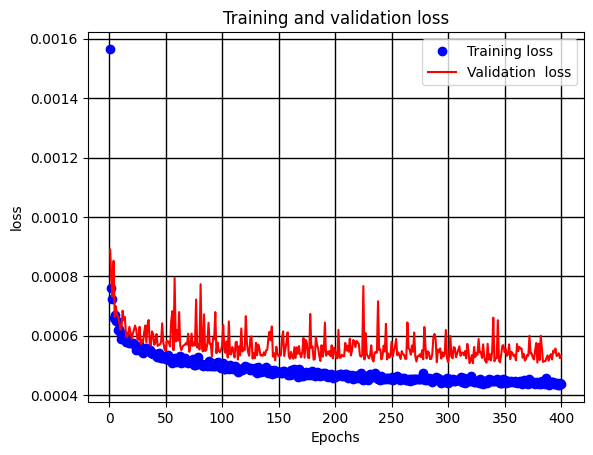

In [14]:
history_dict = model.history.history
epochs = range(1,len(history.history['loss']) + 1)

plt.grid(color='k', linestyle='-', linewidth=1)
plt.plot(epochs,history.history['loss'],'bo', label = 'Training loss')
plt.plot(epochs,history.history['val_loss'],'r', label = 'Validation  loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
import pickle
pickle_out = open ("scalerX.pickRN","wb")
pickle.dump(scaler_X,pickle_out)
pickle_out.close()
pickle_out = open ("X.picktest","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()
pickle_out = open ("y.picktest","wb")
pickle.dump(y_test,pickle_out)
pickle_out.close()